In [46]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

参考教材：Python机器学习预测分析核心算法-[美]M·鲍尔-沙嬴＆李鹏(译)-人民邮电出版社-2017

Machine Learning in Python：Essential Techniques for Predictive Analysis（Python机器学习：预测分析核心算法）, Michael Bowles, Wiley, 2015.pdf

本节以 “岩石&水雷”数据集 为例。此数据集的测量值代表声纳接收器在不同地点接受到的返回信号，其中一半是反映了岩石的形状，一半是金属圆桶的形状（水雷）。 而每个返回信号由60个不同频率返回信号组成。

这是一个分类问题。

In [15]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data

In [3]:
#import urllib2
import pandas as pd
# from StringIO import StringIO

target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"

#data = urllib2.urlopen(target_url)  #.read()
df = pd.read_csv(target_url, header=None, prefix='V')  #StringIO(data)

print("数据集规模：",df.shape)
print("\n数据集数据类型：\n",df.get_dtype_counts())

数据集规模： (208, 61)

数据集数据类型：
 float64    60
object      1
dtype: int64


由此可见，此数据集有在208个地方采集的数据， 每个地方用60个频率进行测量获得60个测量值（float），第61列数据是标签,标记是岩石还是水雷。

In [5]:
df.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


 ## 数据集统计特征


In [6]:
df.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


## 用分位数图展示异常点

分位数图展示数据的百分位边界与高斯分布的同样百分位的边界对比。
以第4列属性为例。

这表明：此数据集尾部的数据要多于高斯分布尾部的数据。

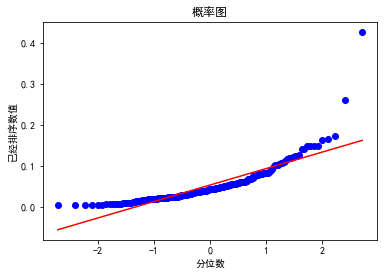

In [47]:
import matplotlib.pyplot as plt
from scipy import stats

stats.probplot(df.iloc[:,3],dist="norm", plot=plt)
plt.xlabel("分位数")
plt.ylabel("已经排序数值")
plt.title("概率图")
plt.show()

## 利用平行坐标图进行可视化
对于具有多个属性问题的一种可视化方法叫平行坐标图，即绘制每行数据由属性值构成的行向量。

R


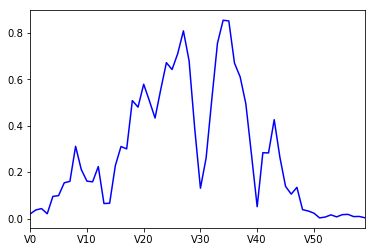

In [22]:
# 第0号数据不是水雷，我们把它的所有属性值用蓝色绘出
print(df.iat[1,60])
df.iloc[0,0:60].plot(color='blue')

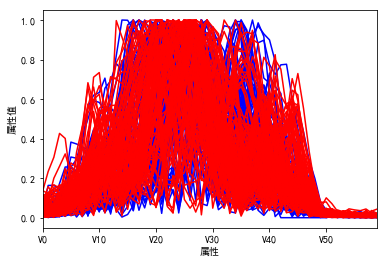

In [48]:
# 把所有数据条目都绘出

for i in range(df.shape[0]):
    if df.iat[i,60] == "M":
        pcolor = "red"
    else:
        pcolor = 'blue'
    df.iloc[i,0:60].plot(color=pcolor)

plt.xlabel("属性")
plt.ylabel("属性值")
plt.show()

虽然对应的图看不出明显的差别，但 1）沿图的底部，蓝色的线要突出一点；2）在30-40之间蓝色的线多少要比红色的线要高点。而这些观察有助于解释和确认某些预测的结果。

## 属性和标签的关系可视化

### 1）首先绘制属性之间的散点图（以2-3， 2-21属性对为例）

下面绘制的两张散点图直观显示，频率离的近的信号相关性要更高，后面的相关系数计算更加说明了这一点。


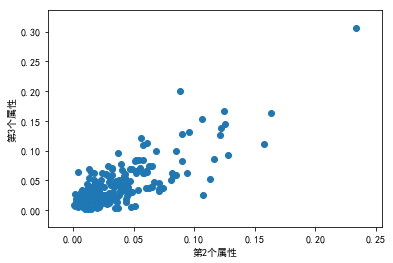

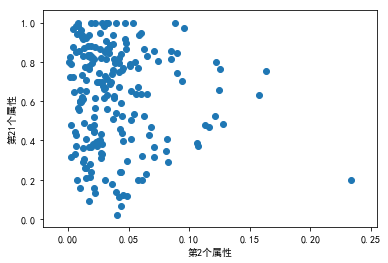

In [49]:
plt.scatter(df.iloc[:,1], df.iloc[:,2])
plt.xlabel("第2个属性")
plt.ylabel("第3个属性")
plt.show()

plt.scatter(df.iloc[:,1], df.iloc[:,21])
plt.xlabel("第2个属性")
plt.ylabel("第21个属性")
plt.show()

### 2）绘制区分度最大的属性（猜测）和标签的散点图
根据前面的平行坐标图，在30-40之间蓝色的线多少要比红色的线要高点，并且大概在35索引值附近有所分离。
于是我们猜测第35个属性区分度最大，并绘制这个属性和标签的散点图。
下面第一张图的散点挤在一起看不清楚，于是故意将标签值上下随机做点扰动，并且进行半透明处理，于是有了第二张图。

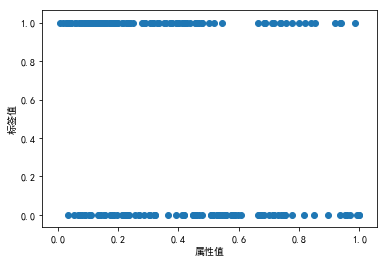

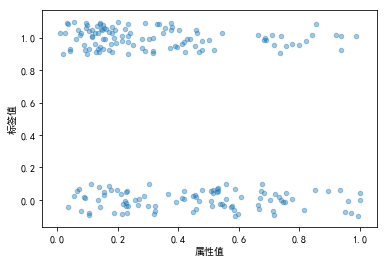

In [55]:
plt.scatter(df["V35"], df["V60"].apply(lambda v: 1.0 if v== 'M' else 0.0))
plt.xlabel("属性值")
plt.ylabel("标签值")
plt.show()

from random import uniform
plt.scatter(df["V35"], df["V60"].apply(lambda v: (1.0 if v== 'M' else 0.0)+uniform(-0.1,0.1)), 
            alpha=0.4, s=20)
# alpha 透明度
# s     数据点的大小
plt.xlabel("属性值")
plt.ylabel("标签值")
plt.show()

观察第二张图， 左上方的点更密集一点（水雷）。经过简单的观察，我们可以建立一个粗略的分类器（至少效果比随机猜测要好点）： 判断第36个属性是否大于0.5，如果大于则判断为岩石，否则判断为水雷。
## 用热度图展示属性和标签的相关性

颜色越红表示相关度越高。 特别地，沿对角线附近的稍浅颜色部分，说明采样频率越接近，相关度越高。

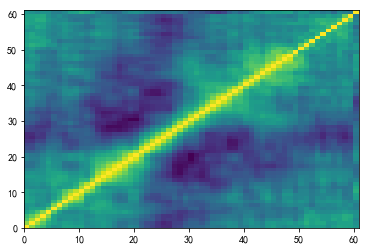

In [60]:
_df = df.copy()
_df["V60"] = _df["V60"].apply(lambda v: 1.0 if v== 'M' else 0.0)
plt.pcolor(_df.corr())
plt.xlim((0,61))
plt.ylim((0,61))
plt.show()

In [57]:
_df = df.copy()
_df.corr()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59
V0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
V1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
V2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
V3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
V4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
V5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
V6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
V7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
V8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
V9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358
